IMPORTING LIBRARIES

In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

IMPORTING DATASET

In [124]:
dataset = pd.read_csv('diabetes.csv')
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

print("X: \n", x)
print("\nY: \n", y)

X: 
 [[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]]

Y: 
 [1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0
 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1
 1 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0
 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0
 1 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0
 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 

TAKING CARE OF MISSING DATA

In [125]:
columns_with_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
dataset[columns_with_zero] = dataset[columns_with_zero].replace(0, np.nan)

In [126]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
dataset[columns_with_zero] = imputer.fit_transform(dataset[columns_with_zero])

SPILT THE DATASET INTO THE TRAINING SET AND TEST SET

In [127]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

FEATURE SCALING

In [128]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

TRAINING THE SVM MODEL ON TRAINING SET

In [129]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(x_train, y_train)

SVC(kernel='linear', random_state=0)

PREDICTING THE TEST SET RESULT

In [130]:
y_pred = classifier.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))

[[1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [1 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]

MAKING THE CONFUSION MATRIX

In [131]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[117  13]
 [ 25  37]]


0.8020833333333334

VISUALISING THE TRAINING SET RESULT

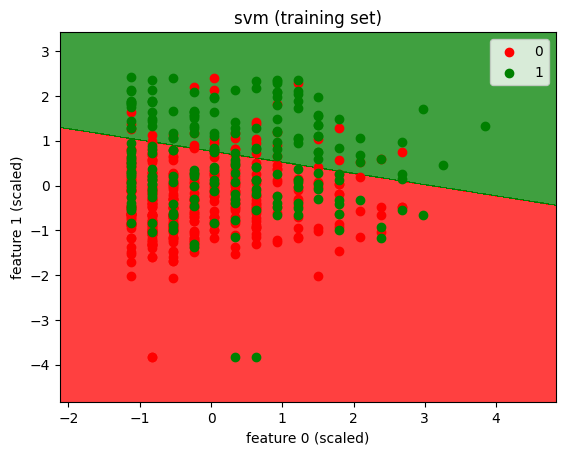

In [132]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train
feature_indices = [0, 1]
X1, X2 = np.meshgrid(
    np.arange(start=x_set[:, feature_indices[0]].min() - 1, stop=x_set[:, feature_indices[0]].max() + 1, step=0.01),
    np.arange(start=x_set[:, feature_indices[1]].min() - 1, stop=x_set[:, feature_indices[1]].max() + 1, step=0.01)
)
X_template = np.mean(x_set, axis=0)
X_grid = np.zeros((X1.ravel().shape[0], x_set.shape[1]))
X_grid[:, feature_indices[0]] = X1.ravel()
X_grid[:, feature_indices[1]] = X2.ravel()
other_features_indices = [i for i in range(x_set.shape[1]) if i not in feature_indices]
X_grid[:, other_features_indices] = X_template[other_features_indices]
y_pred_grid = classifier.predict(X_grid).reshape(X1.shape)
plt.contourf(X1, X2, y_pred_grid, alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, feature_indices[0]], x_set[y_set == j, feature_indices[1]],
                color=ListedColormap(('red', 'green'))(i), label=j)
plt.title('svm (training set)')
plt.xlabel(f'feature {feature_indices[0]} (scaled)')
plt.ylabel(f'feature {feature_indices[1]} (scaled)')
plt.legend()
plt.show()


VISUALISING THE TEST SET RESULT

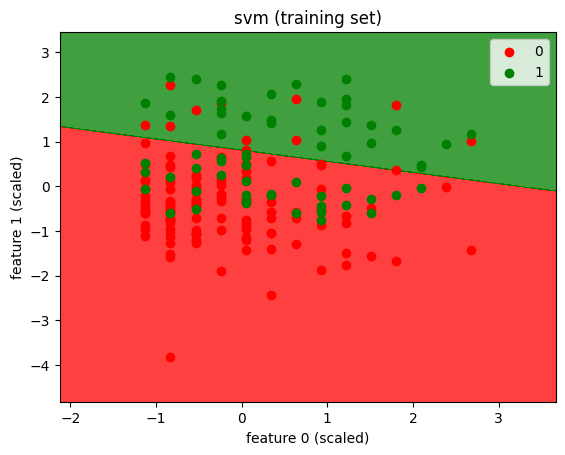

In [133]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_test, y_test
feature_indices = [0, 1]
X1, X2 = np.meshgrid(
    np.arange(start=x_set[:, feature_indices[0]].min() - 1, stop=x_set[:, feature_indices[0]].max() + 1, step=0.01),
    np.arange(start=x_set[:, feature_indices[1]].min() - 1, stop=x_set[:, feature_indices[1]].max() + 1, step=0.01)
)
X_template = np.mean(x_set, axis=0)
X_grid = np.zeros((X1.ravel().shape[0], x_set.shape[1]))
X_grid[:, feature_indices[0]] = X1.ravel()
X_grid[:, feature_indices[1]] = X2.ravel()
other_features_indices = [i for i in range(x_set.shape[1]) if i not in feature_indices]
X_grid[:, other_features_indices] = X_template[other_features_indices]
y_pred_grid = classifier.predict(X_grid).reshape(X1.shape)
plt.contourf(X1, X2, y_pred_grid, alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, feature_indices[0]], x_set[y_set == j, feature_indices[1]],
                color=ListedColormap(('red', 'green'))(i), label=j)
plt.title('svm (training set)')
plt.xlabel(f'feature {feature_indices[0]} (scaled)')
plt.ylabel(f'feature {feature_indices[1]} (scaled)')
plt.legend()
plt.show()
